In [17]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [18]:
# Load data
dow_jones = pd.read_csv('dow_jones_index.data')

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

# 5-A: Data Preparation and Exploration

1. **Clean the dataset**:
   - Address missing values. ✅
   - Check that the dataset contains the correct number of stocks for the index. ✅
   - Change the data types to make the data useable (remove dollar signs and convert columns to float). ✅
   - Identify anomalies using unsupervised methods. ✅
   - Justify anomalies using external sources when possible (have not yet been able to find anything, maybe check for week 3 and 15(the outlier weeks)). ❌

2. **Summarize the dataset**:
   - Use descriptive statistics. ✅

3. **Apply additional techniques**:
   - Perform dimension reduction. ✅
   - Visualize insights and trends. ✅

</div>

In [19]:
# TASK 5A.1, clean the dataset and adress any missing values

display(dow_jones.head())

print("--------------------------------------------------------------------------------------------------------")

columns_to_change = ["open", "high", "low", "close", "next_weeks_open", "next_weeks_close"]

for column in columns_to_change:
    dow_jones[column] = dow_jones[column].replace({"\\$": ""}, regex=True).astype(float)

# Printing unique values in the stock column to confirm that it contains 30 unique stocks as dow jones should
print(dow_jones["stock"].nunique())
print("--------------------------------------------------------------------------------------------------------")

na_indices = dow_jones[dow_jones.isna().any(axis=1)].index
na_rows = dow_jones.iloc[na_indices]
print(f'na_rows: {na_rows}')

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


--------------------------------------------------------------------------------------------------------
30
--------------------------------------------------------------------------------------------------------
na_rows:      quarter stock      date    open    high     low   close      volume  \
0          1    AA  1/7/2011   15.82   16.72   15.78   16.42   239655616   
12         1   AXP  1/7/2011   43.30   45.60   43.11   44.36    45102042   
24         1    BA  1/7/2011   66.15   70.10   66.00   69.38    36258120   
36         1   BAC  1/7/2011   13.85   14.69   13.80   14.25  1453438639   
48         1   CAT  1/7/2011   94.38   94.81   92.30   93.73    24135903   
60         1  CSCO  1/7/2011   20.45   21.00   20.38   20.97   303545878   
72         1   CVX  1/7/2011   91.66   92.48   90.27   91.19    35556288   
84         1    DD  1/7/2011   50.05   50.54   49.28   49.76    27658789   
96         1   DIS  1/7/2011   37.74   40.00   37.62   39.45    72917621   
108        1    GE

In [20]:
# Adress NA values using backfill. 
# Columns backfilled are "percent_change_volume_over_last_wk" and "previous_weeks_volume" for the first week of every stock.
dow_jones.fillna(method="bfill", inplace=True)
print(dow_jones.isna().sum())
dow_jones

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64


C:\Users\victo\AppData\Local\Temp\ipykernel_7824\919779538.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dow_jones.fillna(method="bfill", inplace=True)


,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.79267,1.380223,239655616.0,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.00424,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.52161,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.42098,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.22500,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


Anomalies detected:
         date  close
0  2011-01-07    0.0
16 2011-04-29    1.0
-------------------------------------------------------------------------------------------------------------------------------------------
Summarizing statistics of the normalized, average aggregated closing data:
                      date      close
count                   25  25.000000
mean   2011-03-31 23:02:24   0.462223
min    2011-01-07 00:00:00   0.000000
25%    2011-02-18 00:00:00   0.244729
50%    2011-04-01 00:00:00   0.435682
75%    2011-05-13 00:00:00   0.631172
max    2011-06-24 00:00:00   1.000000
std                    NaN   0.262094
-------------------------------------------------------------------------------------------------------------------------------------------


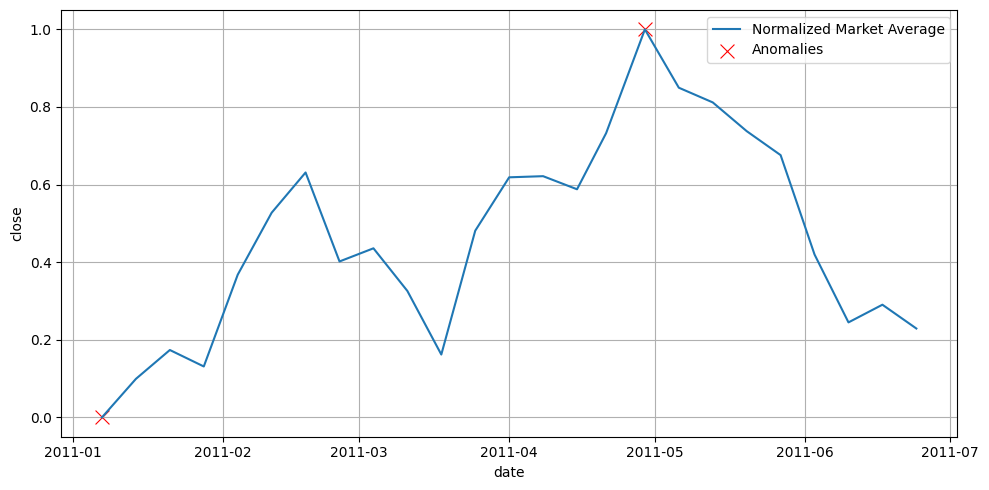

In [21]:
# TASK 5A.1 identify anomolies using unsupervised learning methods
# Normalize "close" data

scaler = MinMaxScaler()

close_df = dow_jones[["close", "date"]].copy()
close_df["date"] = pd.to_datetime(close_df["date"], format="%m/%d/%Y")
close_df = close_df.groupby("date").mean().reset_index()

# Scale the "close" values
close_df["close"] = scaler.fit_transform(close_df[["close"]])

# Step 2: Detect anomalies using Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
close_df["is_anomaly"] = iso_forest.fit_predict(close_df[["close"]])
close_df["is_anomaly"] = close_df["is_anomaly"].apply(lambda x: True if x == -1 else False)
anomalies = close_df[close_df["is_anomaly"]]

# Print anomalies
print("Anomalies detected:")
print(anomalies[["date", "close"]])
print("-------------------------------------------------------------------------------------------------------------------------------------------")

# Print statistics
print("Summarizing statistics of the normalized, average aggregated closing data:")
print(close_df.describe())

# Step 3: Plot the results
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.lineplot(data=close_df, x="date", y="close", ax=ax, label="Normalized Market Average")
sns.scatterplot(data=anomalies, x="date", y="close", color="red", marker="x", s=100, label="Anomalies", ax=ax)

print("-------------------------------------------------------------------------------------------------------------------------------------------")
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

In [22]:
# Task 5A.2 summarize the dataset using descriptive statistics
print(close_df.describe())
print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(close_df.head())
print("-------------------------------------------------------------------------------------------------------------------------------------------")
dow_jones.describe()

                      date      close
count                   25  25.000000
mean   2011-03-31 23:02:24   0.462223
min    2011-01-07 00:00:00   0.000000
25%    2011-02-18 00:00:00   0.244729
50%    2011-04-01 00:00:00   0.435682
75%    2011-05-13 00:00:00   0.631172
max    2011-06-24 00:00:00   1.000000
std                    NaN   0.262094
-------------------------------------------------------------------------------------------------------------------------------------------
        date     close  is_anomaly
0 2011-01-07  0.000000        True
1 2011-01-14  0.099146       False
2 2011-01-21  0.173539       False
3 2011-01-28  0.131105       False
4 2011-02-04  0.367627       False
-------------------------------------------------------------------------------------------------------------------------------------------


,quarter,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
count,750.000000,750.000000,750.000000,750.000000,750.000000,7.500000e+02,750.000000,750.000000,7.500000e+02,750.000000,750.000000,750.000000,750.000000,750.000000
mean,1.520000,53.651840,54.669987,52.640160,53.729267,1.175478e+08,0.050262,4.315595,1.192601e+08,53.702440,53.889080,0.238468,52.525333,0.691826
std,0.499933,32.638852,33.215994,32.119277,32.788787,1.584381e+08,2.517809,40.468295,1.650218e+08,32.778111,33.016677,2.679538,46.335098,0.305482
min,1.000000,10.590000,10.940000,10.400000,10.520000,9.718851e+06,-15.422900,-61.433175,9.718851e+06,10.520000,10.520000,-15.422900,0.000000,0.065574
25%,1.000000,29.830000,30.627500,28.720000,30.365000,3.086624e+07,-1.288053,-21.684982,3.086624e+07,30.315000,30.462500,-1.222068,24.000000,0.534549
50%,2.000000,45.970000,46.885000,44.800000,45.930000,5.306088e+07,0.000000,-0.984000,5.338195e+07,46.015000,46.125000,0.101193,47.000000,0.681067
75%,2.000000,72.715000,74.287500,71.037500,72.667500,1.327218e+08,1.650888,20.695908,1.373260e+08,72.715000,72.915000,1.845562,69.000000,0.854291
max,2.000000,172.110000,173.540000,167.820000,170.580000,1.453439e+09,9.882230,327.408924,1.453439e+09,172.110000,174.540000,9.882230,336.000000,1.564210


<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">


# 5-B: Answer the Exploratory Question
1. **Answer your expolratory question**:

- Select and apply the most suitable algorithm from lectures 1-8 to answer your
question. Justify your choice, document any transformations or hyperparameter
settings, and ensure the analysis generates meaningful and non-trivial insights.
Provide a concrete recommendation based on your findings.

✅❌
**Exploratory questions**
- What is the trend and level? can we identify any seasonality or outliers? ✅
- Can we find and use a clustering algorithm to perform unsupervised classification of the time series to find interesting classes? Can we relate the identified patterns to real-world factors? (Use K-Nearest neighbors maybe) ✅
- How can we uncover discords and motifs and how can they be understood in relation to our data? What external factors could have caused the discords? ❌
- Can we combine insights from the time series components, the predicted classes and discords/motifs to generate new insights about the market? ❌

</div>

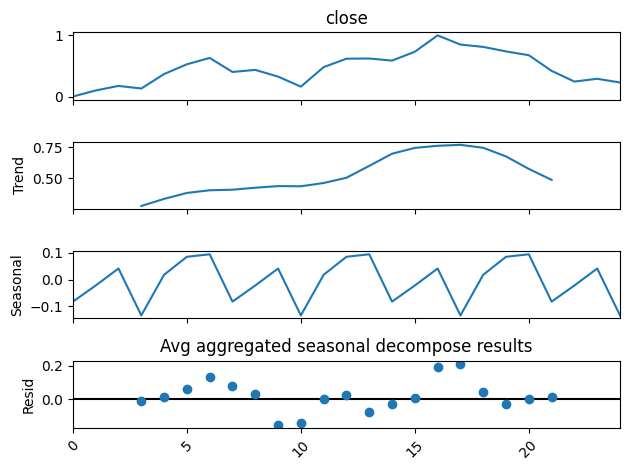

-------------------------------------------------------------------------------------------------------------------------------------------
ADF statistic: -1.1563923998242844
P-value: 0.6920678706569798
Used lag: 8
Number of observations used for ADF test: 16
Critical values: {'1%': -3.9240193847656246, '5%': -3.0684982031250003, '10%': -2.67389265625}
Conclusion: 
Fail to reject the null hypothesis - the series has a unit root (non-stationary)
-------------------------------------------------------------------------------------------------------------------------------------------
Using the visual guidance from the seasonal decompose plot in tandem with the adfuller test we can not accept the data as stationary. From the visual results, the trend seems increasing meanwhile it is hard to determine any exact seasonality frequency. Some order of differncing has to be done to make the data stationary and eligble for modeling via ARIMA.
-----------------------------------------------------

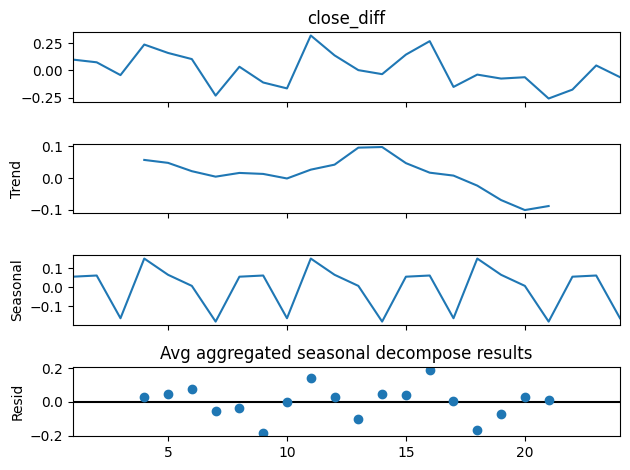

-------------------------------------------------------------------------------------------------------------------------------------------
ADF statistic: -3.9776688246541143
P-value: 0.0015320653120073535
Used lag: 0
Number of observations used for ADF test: 23
Critical values: {'1%': -3.7529275211638033, '5%': -2.998499866852963, '10%': -2.6389669754253307}
Conclusion: 
Reject the null hypothesis - The series is stationary
-------------------------------------------------------------------------------------------------------------------------------------------
After first order differentiating of the data it is now stationary according to the ADF test, which means we can later train a sarima model on the data after differentiating once
-------------------------------------------------------------------------------------------------------------------------------------------


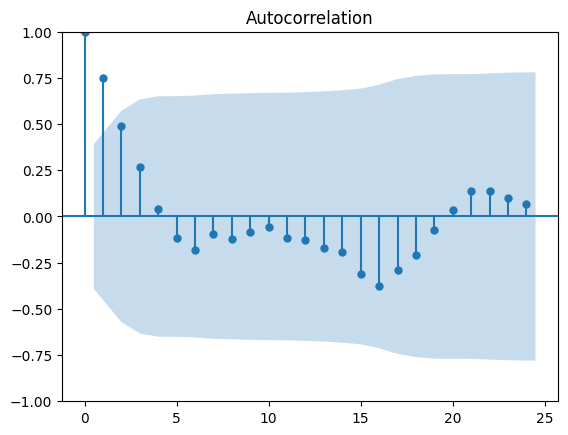

To further support the claim that the data is stationary after differntiating, the ACF plot does not seem to show signs of seasonality


In [23]:
# - What is the trend and level? can we identify any seasonality?

result = seasonal_decompose(close_df["close"], model="addative", period=7)
adf_result = adfuller(close_df["close"])

result.plot()
plt.xticks(rotation=45)
plt.title("Avg aggregated seasonal decompose results")
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(f"ADF statistic: {adf_result[0]}\nP-value: {adf_result[1]}\nUsed lag: {adf_result[2]}\nNumber of observations used for ADF test: {adf_result[3]}\nCritical values: {adf_result[4]}\nConclusion: ")
if adf_result[1] < 0.05:
    print("Reject the null hypothesis - the series is stationary")
else:
    print("Fail to reject the null hypothesis - the series has a unit root (non-stationary)")

print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("Using the visual guidance from the seasonal decompose plot in tandem with the adfuller test we can not accept the data as stationary. From the visual results, the trend seems increasing meanwhile it is hard to determine any exact seasonality frequency. Some order of differncing has to be done to make the data stationary and eligble for modeling via ARIMA.")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("Trying to make the data stationary through differentiating:")

close_df["close_diff"] = close_df["close"].diff()
close_df_dropped = close_df.dropna()
result_diff_1 = seasonal_decompose(close_df_dropped["close_diff"], model="additive", period=7)
adf_result_diff_1 = adfuller(close_df_dropped["close_diff"])
result_diff_1.plot()
plt.title("Avg aggregated seasonal decompose results")
plt.tight_layout()
plt.show()

print("-------------------------------------------------------------------------------------------------------------------------------------------")
print(f"ADF statistic: {adf_result_diff_1[0]}\nP-value: {adf_result_diff_1[1]}\nUsed lag: {adf_result_diff_1[2]}\nNumber of observations used for ADF test: {adf_result_diff_1[3]}\nCritical values: {adf_result_diff_1[4]}\nConclusion: ")
if adf_result_diff_1[1] < 0.05:
    print("Reject the null hypothesis - The series is stationary")
else:
    print("Fail to reject the null hypothesis - The series has a unit root (non-stationary)")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
print("After first order differentiating of the data it is now stationary according to the ADF test, which means we can later train a sarima model on the data after differentiating once")
print("-------------------------------------------------------------------------------------------------------------------------------------------")
plot_acf(close_df["close"], lags=24)
plt.show()
print("To further support the claim that the data is stationary after differntiating, the ACF plot does not seem to show signs of seasonality")

Explained variance per component (90% PCA): [0.47707839 0.11971871 0.09236869 0.07279125 0.07010224 0.06579718
 0.05460627]
Cumulative explained variance (90% PCA): [0.47707839 0.5967971  0.68916579 0.76195704 0.83205928 0.89785646
 0.95246273]


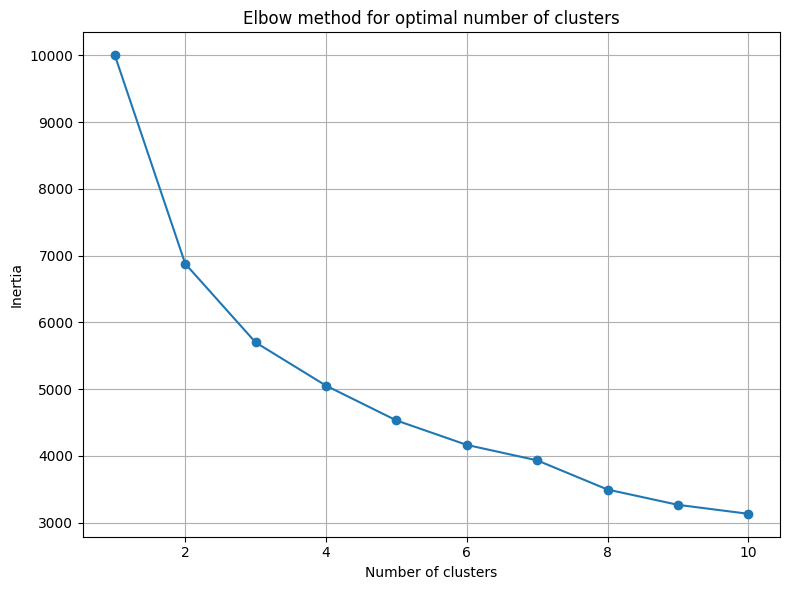

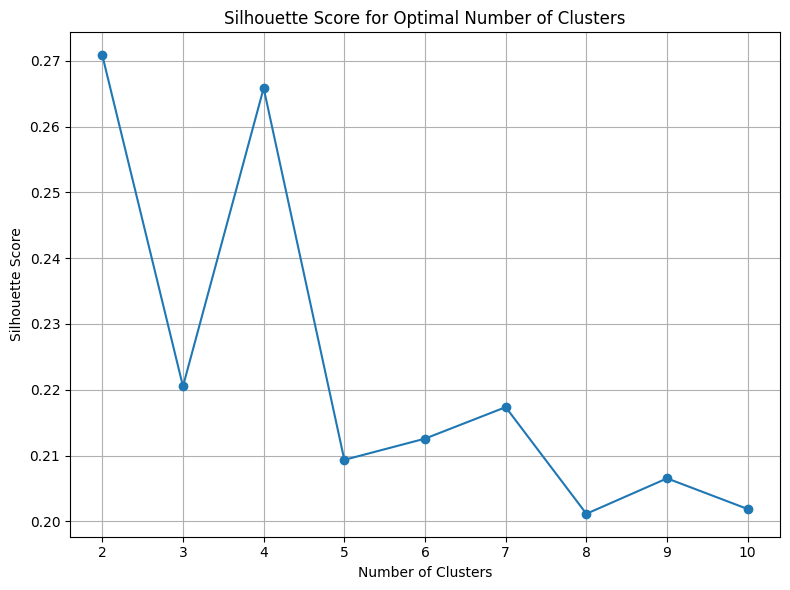

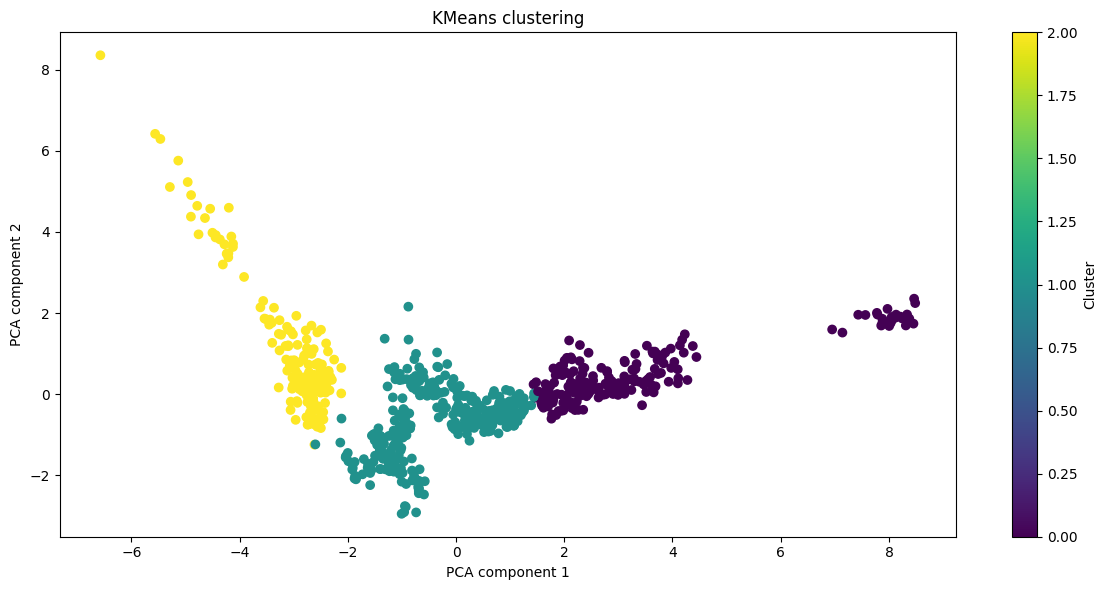

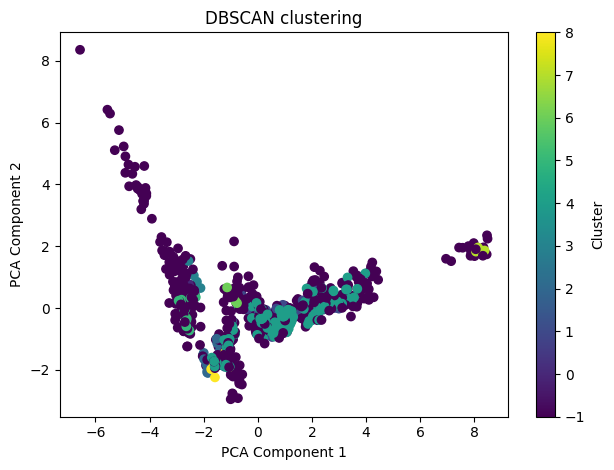

KMeans Cluster Centers in PCA-reduced space:
[[ 3.33224744e+00  4.95769220e-01 -4.13110080e-02 -2.18835947e-02
   3.83907737e-02  5.32294955e-02 -1.14918418e-02]
 [-3.31913187e-01 -7.36427996e-01  6.75975331e-02  3.04834686e-03
  -3.41875487e-03 -8.81754844e-02 -1.75492620e-02]
 [-3.04975659e+00  1.04275675e+00 -1.00466646e-01  1.81364638e-02
  -3.60188179e-02  1.31794816e-01  5.12359950e-02]]

Cluster 0 (KMeans):
Cluster 0: Unique stocks are: ['BA' 'CAT' 'CVX' 'IBM' 'MCD' 'MMM' 'UTX' 'XOM']

Cluster 1 (KMeans):
Cluster 1: Unique stocks are: ['AXP' 'BA' 'DD' 'DIS' 'HD' 'HPQ' 'JNJ' 'JPM' 'KRFT' 'KO' 'MRK' 'PFE' 'PG'
 'T' 'TRV' 'VZ' 'WMT']

Cluster 2 (KMeans):
Cluster 2: Unique stocks are: ['AA' 'BAC' 'CSCO' 'GE' 'INTC' 'MSFT' 'PFE']

DBSCAN Cluster Summary:
dbscan_cluster
-1    455
 4    136
 1     84
 2     26
 5     17
 0     10
 3      7
 6      5
 7      5
 8      5
Name: count, dtype: int64

Cluster 0 (DBSCAN):
     quarter stock       date   open   high    low  close     volume  \

In [24]:
scaler = StandardScaler()

numeric_cols = dow_jones.select_dtypes(include=["number"]).columns
normalized_data = scaler.fit_transform(dow_jones[numeric_cols])

# Step 2: Apply PCA to retain 90% explained variance
pca_90 = PCA(n_components=0.90)  # Retain 90% variance
pca_90_components = pca_90.fit_transform(normalized_data)

# Print explained variance by component and cumulative variance
explained_variance_ratio = pca_90.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print(f"Explained variance per component (90% PCA): {explained_variance_ratio}")
print(f"Cumulative explained variance (90% PCA): {cumulative_variance_ratio}")

# Elbow method
inertia_values = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_90_components)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker="o")
plt.title("Elbow method for optimal number of clusters")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette score method
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_90_components)
    silhouette_avg = silhouette_score(pca_90_components, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o")
plt.title("Silhouette Score for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()

# Determined from elbow method and silhouette score
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
dow_jones["kmeans_cluster"] = kmeans.fit_predict(pca_90_components)

# DBSCAN Clustering
dbscan = DBSCAN(eps=1, min_samples=5) #params not finly adjusted
dow_jones["dbscan_cluster"] = dbscan.fit_predict(pca_90_components)

# Reduce data to 2d for visualization
pca_2d = PCA(n_components=2)
pca_2d_components = pca_2d.fit_transform(pca_90_components)

dow_jones["PCA1"] = pca_2d_components[:, 0]
dow_jones["PCA2"] = pca_2d_components[:, 1]

# Plot KMeans clustering visualized
plt.figure(figsize=(12, 6))
plt.scatter(dow_jones["PCA1"], dow_jones["PCA2"], c=dow_jones["kmeans_cluster"], cmap="viridis")
plt.xlabel("PCA component 1")
plt.ylabel("PCA component 2")
plt.title("KMeans clustering")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

# DBSCAN clustering visualized
plt.scatter(dow_jones["PCA1"], dow_jones["PCA2"], c=dow_jones["dbscan_cluster"], cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN clustering")
plt.colorbar(label="Cluster")
plt.tight_layout()
plt.show()

print("KMeans Cluster Centers in PCA-reduced space:")
print(kmeans.cluster_centers_)

# Inspecting what stocks got clustered together
for cluster_num in range(kmeans.n_clusters):
    print(f"\nCluster {cluster_num} (KMeans):")
    unique_stocks = dow_jones[dow_jones["kmeans_cluster"] == cluster_num]["stock"].unique()
    print(f"Cluster {cluster_num}: Unique stocks are: {unique_stocks}")

print("\nDBSCAN Cluster Summary:")
print(dow_jones["dbscan_cluster"].value_counts())

# Inspecting clusters for DBSCAN
for cluster_num in set(dow_jones["dbscan_cluster"]):
    print(f"\nCluster {cluster_num} (DBSCAN):")
    print(dow_jones[dow_jones["dbscan_cluster"] == cluster_num].head())
    print(f"Cluster {cluster_num}: {dow_jones[dow_jones["dbscan_cluster"] == cluster_num]["stock"].nunique()} unique stocks")

<div style="background-color: #33a2ff; padding: 15px; border-radius: 5px; border: 1px solid #dcdcdc;">

# 5-C: Answer the Predictive Question

✅❌

1. **Split the data**:
- Split your data into training (80%) and testing (20%) sets, with an additional 20% of
the training data reserved for validation. ❌

2. **Build and improve the model**:

- Build and improve your model through at least 5 iterations. Start with a simple
model (e.g., linear or logistic regression), and improve it by modifying datasets,
algorithms, or hyperparameters. Document each change. ❌
3. **Report model performance**:
- Regression: Mean Absolute Error (MAE). ❌
- Classification: Accuracy, and, for imbalanced classes, balanced accuracy or
ROC AUC. ❌

***Predictive questions***:
- Can we create a SARIMA model to accurately predict the value of the Dow Jones index/market average in a given timeframe? If not, what other models can yield better results? ❌
- What timeseries decomposition methods work best for improving the predictions and/or efficiency of our model? ❌
- Can we in other ways engineer the features to improve the accuracy and or efficiency of our model? ❌
- What method of hyperparameter tuning works best for our model? ❌
</div>

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Lik

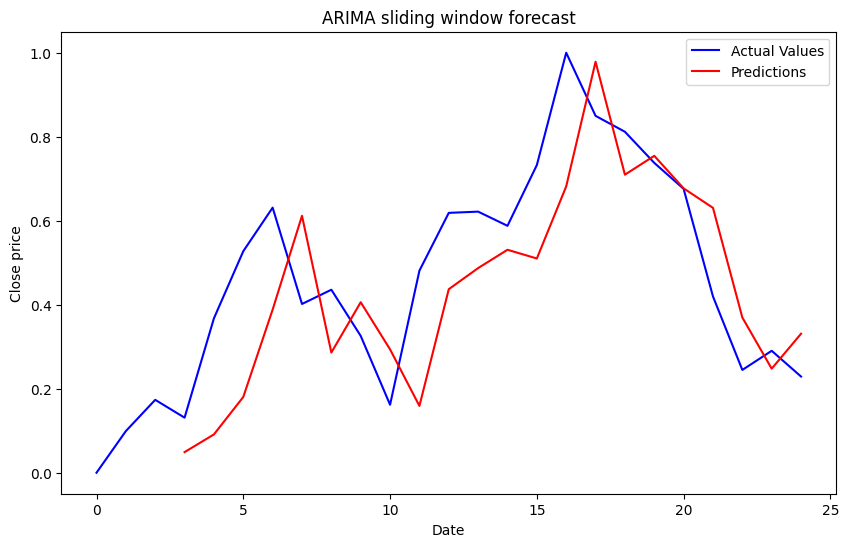

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE of the rolling forecast: 0.0346


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible startin

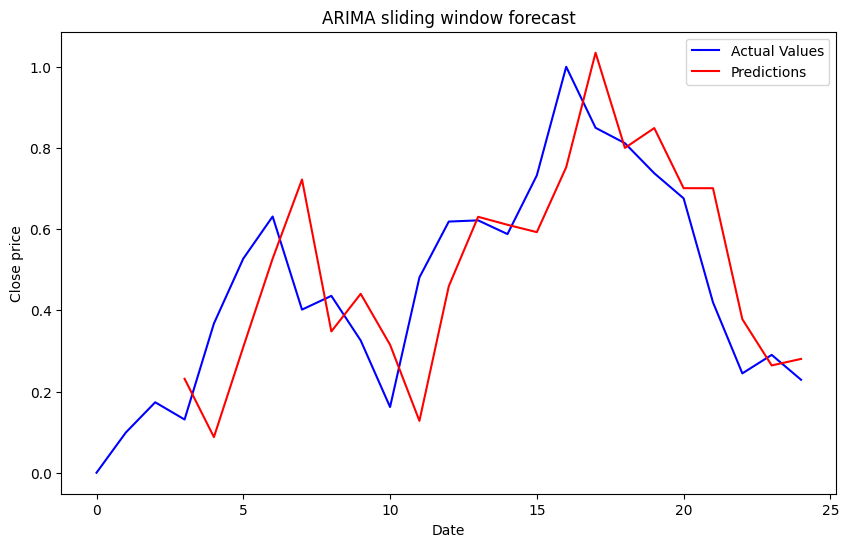

C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


MSE of the rolling forecast: 0.0306


C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\victo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters excep

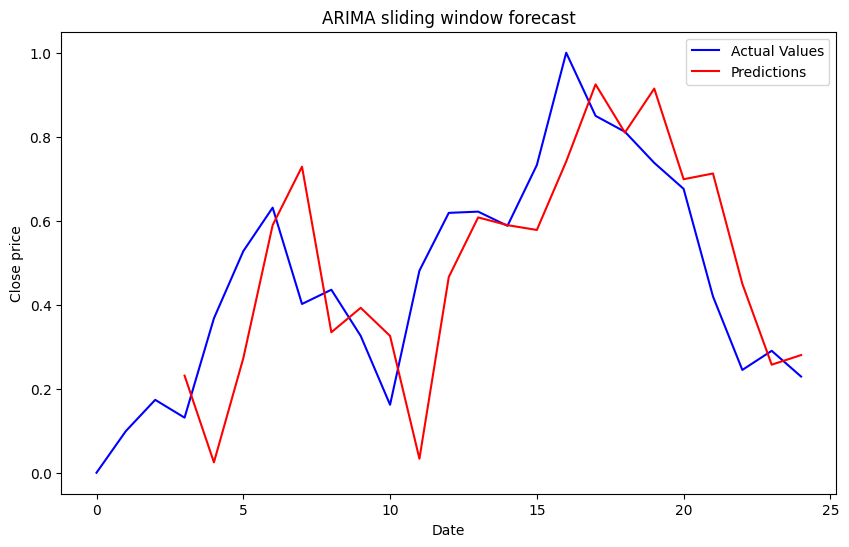

MSE of the rolling forecast: 0.0376


In [25]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

initial_training_window_size = 3
forecast_steps = 1

# function to run sliding window arima, plot the results and return predictions, actual values and params for the model. 
def run_arima (window_size, forecast_steps, data, p, d, q):
    
    predictions = []
    actual_values = []
    params = [p, d, q]
    for i in range(window_size, len(data)):
    
        train_data = data["close"].iloc[0:i]
        test_data = data["close"].iloc[i]

        arima_model = ARIMA(train_data, order=(p, d, q))  #pdq AR order, degree of differentiating, MA order.
        arima_results = arima_model.fit()
    
        forecast = arima_results.forecast(steps=forecast_steps)
        predictions.append(forecast)
        actual_values.append(test_data)

    rolling_predictions_series = pd.Series(predictions, index=close_df.index[window_size:])
    rolling_actual_series = pd.Series(actual_values, index=close_df.index[window_size:])

    plt.figure(figsize=(10, 6))
    plt.plot(data.index, close_df["close"], label="Actual Values", color="blue")
    plt.plot(rolling_predictions_series.index, rolling_predictions_series, label="Predictions", color="red")
    plt.legend()
    plt.title("ARIMA sliding window forecast")
    plt.xlabel("Date")
    plt.ylabel("Close price")
    plt.show()
    
    mse = mean_squared_error(actual_values, predictions)
    print(f"MSE of the rolling forecast: {mse:.4f}")
    
    return predictions, actual_values, mse, params

predictions, actual, mse, params =  run_arima(3, 1, close_df, 1, 0, 1)
predictions1, actual1, mse1, params1 =  run_arima(3, 1, close_df, 1, 1, 1)
predictions2, actual2, mse2, params2 =  run_arima(3, 1, close_df, 2, 1, 2)

In [26]:
# Defining and trying a trading strategy based of our predictions

def dates_to_buy_short(predictions, normalized_agg_data):
    
    normalized_agg_data["predictions"] = np.nan
    start_index = len(normalized_agg_data) - len(predictions)
    normalized_agg_data.iloc[start_index:, normalized_agg_data.columns.get_loc("predictions")] = predictions

    dates_to_buy = []
    dates_to_short = []
    
    for i in range(len(normalized_agg_data) - 1):
        if (
            normalized_agg_data["close"].iloc[i] < normalized_agg_data["predictions"].iloc[i + 1]
            and not np.isnan(normalized_agg_data["predictions"].iloc[i + 1])
        ):
            dates_to_buy.append(normalized_agg_data.index[i])

        elif (
            normalized_agg_data["close"].iloc[i] > normalized_agg_data["predictions"].iloc[i + 1]
            and not np.isnan(normalized_agg_data["predictions"].iloc[i + 1])
        ):

            dates_to_short.append(normalized_agg_data.index[i])
      
    return dates_to_buy, dates_to_short

def run_strat(dates_to_buy, dates_to_short, data, fixed_investment=10000):
    
    bankroll = 100_000
    trades = []
    
    dates_to_buy = pd.to_datetime(dates_to_buy)
    dates_to_short = pd.to_datetime(dates_to_short)
    
    formatted_dates_buy = dates_to_buy.strftime("%-m/%-d/%Y")
    formatted_dates_short = dates_to_short.strftime("%-m/%-d/%Y")
    
    if formatted_dates_buy.str.startswith("0").any():
        formatted_dates_buy = formatted_dates_buy.str.lstrip("0").str.replace("/0", "/")
    if formatted_dates_short.str.startswith("0").any():
        formatted_dates_short = formatted_dates_short.str.lstrip("0").str.replace("/0", "/")
    
    for stock in data["stock"].unique():
        stock_data = data[data["stock"] == stock]
        
        for i in range(len(stock_data) - 1):
            current_date = stock_data.iloc[i]["date"]
            
            if current_date in formatted_dates_buy:
                buy_price = stock_data.iloc[i]["close"]
                buy_date = current_date
                sell_price = stock_data.iloc[i]["next_weeks_close"]
                sell_date = stock_data.iloc[i+1]["date"]
                num_shares = fixed_investment / buy_price
                profit_or_loss = (sell_price - buy_price) * num_shares
                bankroll += profit_or_loss
            
                trades.append({
                    "stock": stock,
                    "buy_date": buy_date,
                    "buy_price": buy_price,
                    "sell_date": sell_date,
                    "sell_price": sell_price,
                    "profit_or_loss": profit_or_loss,
                    "bankroll": bankroll
                })
            
            elif current_date in formatted_dates_short:
                short_price = stock_data.iloc[i]["close"]
                short_date = current_date
                cover_price = stock_data.iloc[i]["next_weeks_close"]
                cover_date = stock_data.iloc[i+1]["date"]
                num_shares = fixed_investment / short_price
                profit_or_loss = (short_price - cover_price) * num_shares
                bankroll += profit_or_loss
                
                trades.append({
                    "stock": stock,
                    "short_date": short_date,
                    "short_price": short_price,
                    "cover_date": cover_date,
                    "cover_price": cover_price,
                    "profit_or_loss": profit_or_loss,
                    "bankroll": bankroll
                })
                
    return bankroll, trades


dates_to_buy, dates_to_short = dates_to_buy_short(predictions, close_df)

bankroll, trades = run_strat(dates_to_buy, dates_to_short, dow_jones)

rows = []

# Iterate through the trades and format the data for the DataFrame
for trade in trades:
    row = {
        "stock": trade.get("stock"),
        "buy_date": trade.get("buy_date", ""),
        "buy_price": trade.get("buy_price", ""),
        "sell_date": trade.get("sell_date", ""),
        "sell_price": trade.get("sell_price", ""),
        "short_date": trade.get("short_date", ""),
        "short_price": trade.get("short_price", ""),
        "cover_date": trade.get("cover_date", ""),
        "cover_price": trade.get("cover_price", ""),
        "profit_or_loss": trade.get("profit_or_loss"),
        "bankroll": trade.get("bankroll"),
    }
    rows.append(row)

trade_df = pd.DataFrame(rows)

trade_df["buy_date"] = pd.to_datetime(trade_df["buy_date"])
trade_df["short_date"] = pd.to_datetime(trade_df["short_date"])

plt.figure(figsize=(10, 6))
plt.bar(trade_df.index, trade_df["profit_or_loss"], color="green")
plt.axhline(0, color="red")
plt.title("Profit/Loss per trade")
plt.xlabel("Trade number")
plt.ylabel("Profit or loss ($)")
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(trade_df.index, trade_df["bankroll"], color="green")
plt.title("Cumulative bankroll over trades")
plt.grid()
plt.xlabel("Trade number")
plt.ylabel("Bankroll ($)")
plt.show()

KeyError: 'buy_date'